<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 3: Aprendizaje por Refuerzo

En aprendizaje por refuerzo (ó Reinforcement Learning en inglés) no tenemos una “etiqueta de salida”, por lo que no es de tipo supervisado y si bien estos algoritmos aprenden por sí mismos, tampoco son de tipo no supervisado, en donde se intenta clasificar grupos teniendo en cuenta alguna distancia entre muestras.

En el mundo real contamos con múltiples variables que por lo general se interrelacionan y que dependen de otras variables y dan lugar a escenarios más grandes en donde tomar decisiones. Para conducir un coche no basta una inteligencia que pueda detectar un semáforo en rojo, verde ó amarillo; tendremos muchísimos factores -todos a la vez- a los que prestar atención: a qué velocidad vamos, estamos ante una curva?, hay peatones?, es de noche y debemos encender las luces?.

Una solución sería tener múltiples máquinas de ML supervisadas y que interactúan entre si -y esto no estaría mal- ó podemos cambiar el enfoque… Y ahí aparece el Reinforcement Learning (RL) como una alternativa, tal vez de las más ambiciosas en las que se intenta integrar el Machine Learning en el mundo real, sobre todo aplicado a robots y maquinaria industrial.

El **Reinforcement Learning entonces**, intentará hacer aprender a la máquina basándose en un esquema de “premios y castigos” -cómo con el perro de Pablov- en un entorno en donde hay que tomar acciones y que está afectado por múltiples variables que cambian con el tiempo.

## Componentes del RL

El **Reinforcement Learning** propone un nuevo enfoque para hacer que nuestra máquina aprenda, para ello, postula los siguientes 2 componentes:

> el `Agente`: será nuestro modelo que queremos entrenar y que aprenda a tomar decisiones.

> `Ambiente`: será el entorno en donde interactúa y “se mueve” el agente. El ambiente contiene las limitaciones y reglas posibles a cada momento.

Entre ellos hay una relación que se retroalimenta y cuenta con los siguientes nexos:

> `Acción`: las posibles acciones que puede tomar en un momento determinado el Agente.

> `Estado (del ambiente)`: son los indicadores del ambiente de cómo están los diversos elementos que lo componen en ese momento.

> `Recompensas (ó castigos!)`: a raíz de cada acción tomada por el Agente, podremos obtener un premio ó una penalización que orientarán al Agente en si lo está haciendo bien ó mal.

![title](Figures/mdp_diagram.svg)

En un primer momento, el agente recibe un estado inicial y toma una acción con lo cual influye é interviene en el ambiente. Esto está muy bien, pues es muy cierto que cuando tomamos decisiones en el mundo real lo estamos modificando, ¿no?. Y esa decisión tendrá sus consecuencias: en la siguiente iteración el ambiente devolverá al agente el nuevo estado y la recompensa obtenida. Si la recompensa es positiva estaremos reforzando ese comportamiento para el futuro. En cambio si la recompensa es negativa lo estaremos penalizando, para que ante la misma situación el agente actúe de manera distinta. El esquema en el que se apoya el Reinforcement Learning es en el de **Proceso de Decisión de Markov**.

## Q-Learning

Ahora vamos a comentar uno de los modelos usados en Reinforcement Learning para poder concretar un ejemplo de su implementación. Es el llamado “Q-Learning”.

Repasemos los elementos que tenemos:

> Políticas: Es una tabla (aunque puede tener n-dimensiones) que le indicará al modelo “como actuar” en cada estado.

> Acciones: las diversas elecciones que puede hacer el agente en cada estado

> Recompensas: si sumamos ó restamos puntaje con la acción tomada
Comportamiento “avaro” (greedy en inglés) del agente. Es decir, si se dejará llevar por grandes recompensas inmediatas, ó irá explorando y valorando las riquezas a largo plazo

El objetivo principal al entrenar nuestro modelo a través de las simulaciones será ir “rellenando” la tabla de Políticas de manera que las decisiones que vaya tomando nuestro agente obtengan “la mayor recompensa” a la vez que avanzamos y no nos quedamos estancados, es decir, pudiendo cumplir el objetivo global (ó final) que deseamos alcanzar.

A la política la llamaremos “Q” por lo que:

```
Q(estado, acción) nos indicará el valor de la política para un estado y una acción determinados.
```

Y para saber cómo ir completando la tabla de políticas nos valemos de la ecuación de Bellman.

$$ \hat{Q}(s,a) = Q(s,a) + \alpha [R +(\lambda \max Q(s')) - Q(s,a)]$$

- $Q(s,a)$ valor actual
- $\alpha$ ratio de aprendizaje
- $R$ Recompensa
- $\lambda$ tasa descuento
- $\max Q(s')$ valor óptimo esperado
- $Q(s,a)$ valor actual

La idea es ir actualizando las políticas Q^(s,a) en base al valor actual más una futura recompensa que recibiremos, en caso de tomar dicha acción. Hay dos ratios que afectan a la manera en que influye esa recompensa: el ratio de aprendizaje, que regula “la velocidad” en la que se aprende, y la “tasa de descuento” que tendrá en cuenta la recompensa a corto o largo plazo.

## La librería Gym:

Gym es una librería para aplicaciones de aprendizaje reforzado. Nos proporciona una interfaz sencilla para un gran número de tareas, entre ellas

- Tareas de control clásicas (CartPole, Pendulum, MountainCar, etc.)
- Videojuegos clásicos (Space Invaders, Breakout, Pong, etc.)
- Tareas de control continuo
- Manipulación de brazo robótico

En esta sección vamos a familiarizarnos con los cinco métodos que usaremos al resolver un problema de control.

In [ ]:
#!pip install gym==0.21.0

In [2]:
import gym
import numpy as np
from IPython import display
from matplotlib import pyplot as plt

from envs import Maze


##### Creando el entorno: Maze()

Para crear un entorno, simplemente pase una cadena con su nombre al método gym.make. Si el entorno existe, el método devuelve una instancia de la clase gym.Env, que representa el entorno de la tarea que vamos a resolver.

In [3]:
env = Maze()

###### env.reset()

Este método pone el entorno en su estado inicial y lo devuelve para que el agente pueda observarlo.


In [4]:
initial_state = env.reset()
print(f"The new episode will start in state: {initial_state}")

The new episode will start in state: (0, 0)


##### env.render()

Este método genera una imagen que representa el estado actual del entorno, en forma de np.ndarray.

In [5]:
from gym.envs.classic_control import rendering

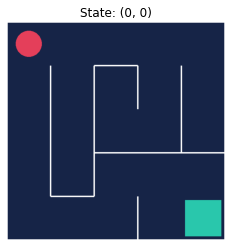

In [6]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f"State: {initial_state}")
plt.imshow(frame)

##### env.step()

Este método aplica la acción seleccionada por el agente en el entorno, para modificarlo. En respuesta, el entorno devuelve una tupla de cuatro objetos:

- El siguiente estado
- La recompensa obtenida
- (bool) si la tarea ha sido completada
- cualquier otra información relevante en un diccionario de python

In [7]:
action = 2
next_state, reward, done, info = env.step(action)
print(f"After moving down 1 row, the agent is in state: {next_state}")
print(f"After moving down 1 row, we got a reward of: {reward}")
print("After moving down 1 row, the task is", "" if done else "not", "finished")

After moving down 1 row, the agent is in state: (1, 0)
After moving down 1 row, we got a reward of: -1.0
After moving down 1 row, the task is not finished


###### Renderizar el nuevo estado

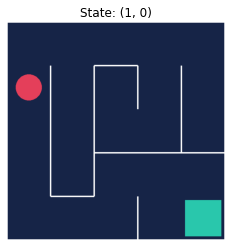

In [8]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f"State: {next_state}")
plt.imshow(frame)

##### env.close()

Completa la tarea y cierra el entorno, liberando los recursos asociados.

In [9]:
env.close()

## Maze environment: Find the exit.


In this section we are going to familiarize ourselves with the environment that we'll use in the lessons 2 (dynamic programming), 3 (Monte Carlo methods) and 4 (temporal difference methods). This environment is perfect for learning the basics of Reinforcement Learning because:

- It has few states (25)
- Transitions between states are deterministic ($p(s', r| s, a) = 1$)
- All rewards are the same (-1) until the episode concludes. Thus facilitating the study of the value and action-value functions

Through this environment, we are going to review the concepts seen in lesson 1 (The Markov decision process):

- States and state space
- Actions and action space
- Trajectories and episodes
- Rewards and returns
- Policy


The environment is a maze of 5x5 cells, in which the goal of the agent is to find the exit, located in the lower right corner, in the cell (4,4). In the image, the exit is colored in light green.

To reach the exit, the agent can take four different actions: move up, move down, move left and move right.


En esta sección vamos a familiarizarnos con el entorno para el algoritmo de programación dinámica, métodos Monte Carlo y métodos de diferencia temporal. Este entorno es perfecto para aprender los conceptos básicos del aprendizaje por refuerzo porque:

- Tiene pocos estados (25)
- Las transiciones entre estados son deterministas ($p(s', r| s, a) = 1$)
- Todas las recompensas son iguales (-1) hasta que concluye el episodio. Facilitando así el estudio de las funciones valor y acción-valor

A través de este entorno, vamos a repasar los conceptos del proceso de decisión de Markov:

- Estados y espacio de estados
- Acciones y espacio de acción.
- Trayectorias y episodios
- Recompensas y devoluciones
- Política


El entorno es un laberinto de celdas de 5x5, en el que el objetivo del agente es encontrar la salida, ubicada en la esquina inferior derecha, en la celda (4,4). En la imagen, la salida está coloreada en verde claro.

Para llegar a la salida, el agente puede realizar cuatro acciones diferentes: moverse hacia arriba, moverse hacia abajo, moverse hacia la izquierda y moverse hacia la derecha.

###### Creando el entorno

In [10]:
env = Maze()

##### Estados y espacio de estados

Los estados consisten en una tupla de dos números enteros, ambos en el rango [0, 4], que representan la fila y la columna en la que se encuentra actualmente el agente:
<br>
<br>

\begin{equation}
    s = (row, column) \;\\
    row, column \in \{0,1,2,3, 4\}
\end{equation}
<br>
<br>
El espacio de estado (conjunto de todos los estados posibles en la tarea) tiene 25 elementos (todas las combinaciones posibles de filas y columnas):


\begin{equation}
    Rows \times Columns \;\\
    S = \{(0, 0), (0, 1), (1, 0), ...\}
\end{equation}

La información sobre el espacio de estado se almacena en la propiedad env.observation_space. En este entorno, es de tipo MultiDiscrete([5 5]), lo que significa que consta de dos elementos (filas y columnas), cada uno con 5 valores diferentes.

In [11]:
print(f"For example, the initial state is: {env.reset()}")
print(f"The space state is of type: {env.observation_space}")

For example, the initial state is: (0, 0)
The space state is of type: MultiDiscrete([5 5])


##### Acciones y espacio de acción

En este entorno, hay cuatro acciones diferentes y se representan con números enteros:

\begin{equation}
a \in \{0, 1, 2, 3\}
\end{equation}

- 0 -> move up
- 1 -> move right
- 2 -> move down
- 3 -> move left

Para ejecutar una acción, simplemente pásela como argumento al método env.step. La información sobre el espacio de acción se almacena en la propiedad env.action_space que es de clase Discreto (4). Esto significa que en este caso solo consta de un elemento en el rango [0,4), a diferencia del espacio de estado que se ve arriba.


In [12]:
print(f"An example of a valid action is: {env.action_space.sample()}")
print(f"The action state is of type: {env.action_space}")

An example of a valid action is: 1
The action state is of type: Discrete(4)


##### Trayectorias y episodios

Una trayectoria es la secuencia generada al pasar de un estado a otro (ambos arbitrarios)
\begin{equation}
  \tau = S_0, A_0, R_1, S_1, A_1, ... R_N, S_N,
\end{equation}

Generemos una trayectoria de 3 movimientos en código:

In [13]:
env = Maze()
state = env.reset()
trajectory = []
for _ in range(3):
    action = env.action_space.sample()
    next_state, reward, done, extra_info = env.step(action)
    trajectory.append([state, action, reward, done, next_state])
    state = next_state
env.close()

print(f"first trajectory:\n{trajectory}")

first trajectory:
[[(0, 0), 1, -1.0, False, (0, 1)], [(0, 1), 0, -1.0, False, (0, 1)], [(0, 1), 1, -1.0, False, (0, 2)]]


Un episodio es una trayectoria que va desde el estado inicial del proceso hasta el final:

\begin{equation}
  \tau = S_0, A_0, R_1, S_1, A_1, ... R_T, S_T,
\end{equation}
donde T es el estado terminal.

Generemos un episodio completo en código:

In [14]:
env = Maze()
state = env.reset()
episode = []
done = False
while not done:
    action = env.action_space.sample()
    next_state, reward, done, extra_info = env.step(action)
    episode.append([state, action, reward, done, next_state])
    state = next_state
env.close()

print(f"first episode:\n{episode}")

first episode:
[[(0, 0), 0, -1.0, False, (0, 0)], [(0, 0), 0, -1.0, False, (0, 0)], [(0, 0), 0, -1.0, False, (0, 0)], [(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 1, -1.0, False, (0, 1)], [(0, 1), 1, -1.0, False, (0, 2)], [(0, 2), 3, -1.0, False, (0, 1)], [(0, 1), 0, -1.0, False, (0, 1)], [(0, 1), 2, -1.0, False, (1, 1)], [(1, 1), 1, -1.0, False, (1, 1)], [(1, 1), 0, -1.0, False, (0, 1)], [(0, 1), 3, -1.0, False, (0, 0)], [(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 2, -1.0, False, (1, 0)], [(1, 0), 1, -1.0, False, (1, 0)], [(1, 0), 0, -1.0, False, (0, 0)], [(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 0, -1.0, False, (0, 0)], [(0, 0), 1, -1.0, False, (0, 1)], [(0, 1), 1, -1.0, False, (0, 2)], [(0, 2), 1, -1.0, False, (0, 3)], [(0, 3), 3, -1.0, False, (0, 2)], [(0, 2), 2, -1.0, False, (0, 2)], [(0, 2), 0, -1.0, False, (0, 2)], [(0, 2), 1, -1.0, False, (0, 3)], [(0, 3), 1, -1.0, False, (0, 4)], [(0, 4), 3, -1.0, False, (0, 3)], [(0, 3), 0, -1.0, False, (0, 3)]

##### Recompensas y devoluciones

Una recompensa es un feedback numérico que genera el entorno cuando el agente realiza una acción *a* en un estado *s*:

\begin{equation}
    r = r(s, a)
\end{equation}

Generemos una recompensa del entorno:

In [15]:
env = Maze()
state = env.reset()
action = env.action_space.sample()
_, reward, _, _ = env.step(action)
print(f"We achieved a reward of {reward} by taking action {action} in state {state}")

We achieved a reward of -1.0 by taking action 2 in state (0, 0)


La rentabilidad asociada a un momento en el tiempo *t* es la suma (descontada) de recompensas que obtiene el agente a partir de ese momento. Vamos a calcular $G_0$, es decir, la vuelta al principio del episodio:

\begin{equation}
    G_0 = R_1 + \gamma R_2 + \gamma^2 R_3 + ... + \gamma^{T-1} R_T
\end{equation}



Supongamos que el factor de descuento $\gamma = 0.99$:


In [16]:
env = Maze()
state = env.reset()
done = False
gamma = 0.99
G_0 = 0
t = 0
while not done:
    action = env.action_space.sample()
    _, reward, done, _ = env.step(action)
    G_0 += gamma ** t * reward
    t += 1
env.close()

print(
    f"""It took us {t} moves to find the exit, 
    and each reward r(s,a)=-1, so the return amounts to {G_0}""")

It took us 352 moves to find the exit, 
    and each reward r(s,a)=-1, so the return amounts to -97.0920395314196


##### Política

Una política es una función $\pi(a|s) \in [0, 1]$ que da la probabilidad de una acción dado el estado actual. La función toma el estado y la acción como entradas y devuelve un valor flotante en [0,1].

Dado que en la práctica necesitaremos calcular las probabilidades de todas las acciones, representaremos la política como una función que toma el estado como argumento y devuelve las probabilidades asociadas con cada una de las acciones. Por lo tanto, si las probabilidades son:

[0,5, 0,3, 0,1]

entenderemos que la acción con índice 0 tiene un 50% de probabilidad de ser elegida, la de índice 1 tiene un 30% y la de índice 2 tiene un 10%.

Codifiquemos una función de política que elija acciones al azar:

In [17]:
def random_policy(state):
    return np.array([0.25] * 4)

## Ejejcutando un episodio con una política aleatoria

###### Crear y resetear el entorno

In [18]:
env = Maze()
state = env.reset()

###### Compute $p(a|s) \; \forall a \in \{0, 1, 2, 3\}$

In [19]:
action_probabilities = random_policy(state)

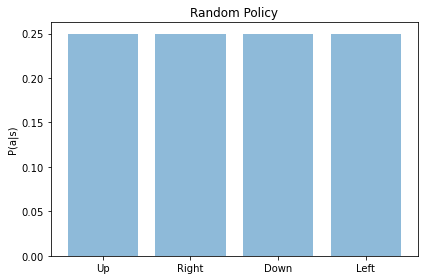

In [20]:
objects = ('Up', 'Right', 'Down', 'Left')
y_pos = np.arange(len(objects))

plt.bar(y_pos, action_probabilities, alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('P(a|s)')
plt.title('Random Policy')
plt.tight_layout()

plt.show()

###### Usar la política para ejecutar un episodio

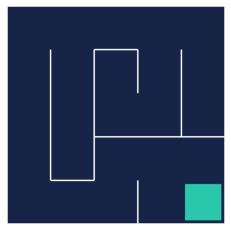

In [21]:
env.reset()
done = False
img = plt.imshow(env.render(mode='rgb_array')) 
while not done:
    action = np.random.choice(range(4), 1, p=action_probabilities)
    _, _, done, _ = env.step(action)
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
env.close()